In [64]:
from epoch_viz.viz import EpochViz
import numpy as np
import matplotlib.pyplot as plt

In [65]:
ez = EpochViz("spatial", ".temp")
ez.print_info()

Here are the some infomation about the data in the directory: spatial

Total number of sdf files: 3337
------------------------------------------------------------
Available data inside the sdf files:
	Ey	Ne	N
------------------------------------------------------------
Input deck information:
	Wavelength (m): 1.0000e-06
	Laser Width (tau): 2.0000e+01
	Max Time (tau): 4.0000e+01
	Dump Time Step (s): 4.0000e-17
	Normalized Vector Potential: 1.0000e+00
	Density Factor: 2.0000e+00
	Number of Grid Points: 3.0000e+04
	Minimum X (wavelength): -2.0000e+01
	Maximum X (wavelength): 1.0000e+01
	Thickness of Plasma (wavelength): 1.0000e+00
	Particles per Cell: 1.0000e+02
	Start Position of Plasma (wavelength): 0.0000e+00
	Temperature of Plasma (eV): 5.0000e+01
------------------------------------------------------------
Calculated Parameters:
	Box Size (m): 3.0000e-05
	Grid Spacing (m): 1.0000e-09
	Time Step (s): 3.1689e-18
	Run Time (s): 1.3343e-13
	Laser Frequency (Hz): 1.8837e+15
	Laser Width 

Data is not loaded. Loading data...


Loading Data...: 100%|██████████| 501/501 [00:01<00:00, 382.68it/s]


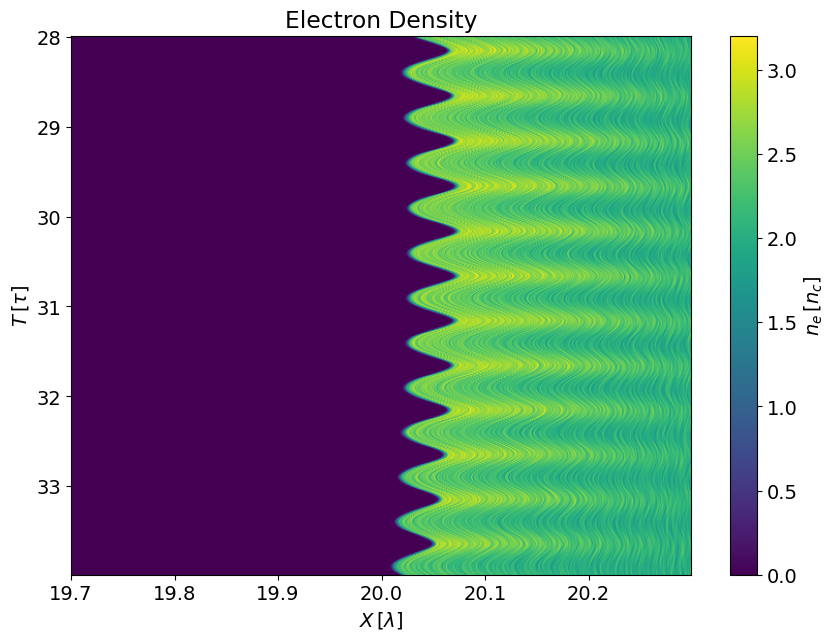

In [66]:
time_range = (28.0, 34.0)
space_range = (19.7, 20.3)
times_are_nodes = False
space_are_nodes = False
fig, ax = ez.plot_density_image(
    normalize=True,
    time_range=time_range,
    space_range=space_range,
    times_are_nodes=times_are_nodes,
    space_are_nodes=space_are_nodes,
    cmap = "viridis",
    aspect="auto",
    show_fig=False
)

In [67]:
Ts = np.linspace(ax.get_ylim()[0], ax.get_ylim()[1], ez.time_nodes.shape[0])
Xs = np.linspace(ax.get_xlim()[0], ax.get_xlim()[1], ez.space_nodes.shape[0])
Ts = Ts[::-1]

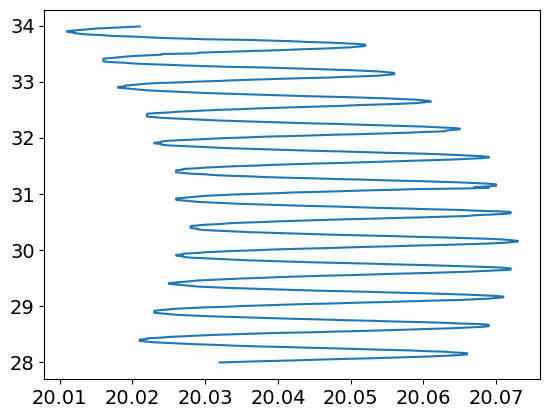

In [68]:
grad = np.gradient(ez.data["Ne"])
envelop = np.argmax(grad[1], axis=1)
plt.plot(Xs[envelop], Ts)

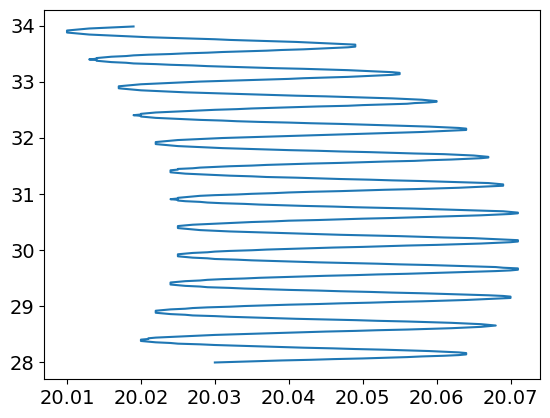

In [69]:
first = np.zeros(ez.data["Ne"].shape[0], dtype=int)
for i in range(ez.data["Ne"].shape[0]):
    nonzeros = np.where(ez.data["Ne"][i]>1/4)[0]
    if len(nonzeros) > 0:
        first[i] = nonzeros[0]

plt.plot(Xs[first], Ts)

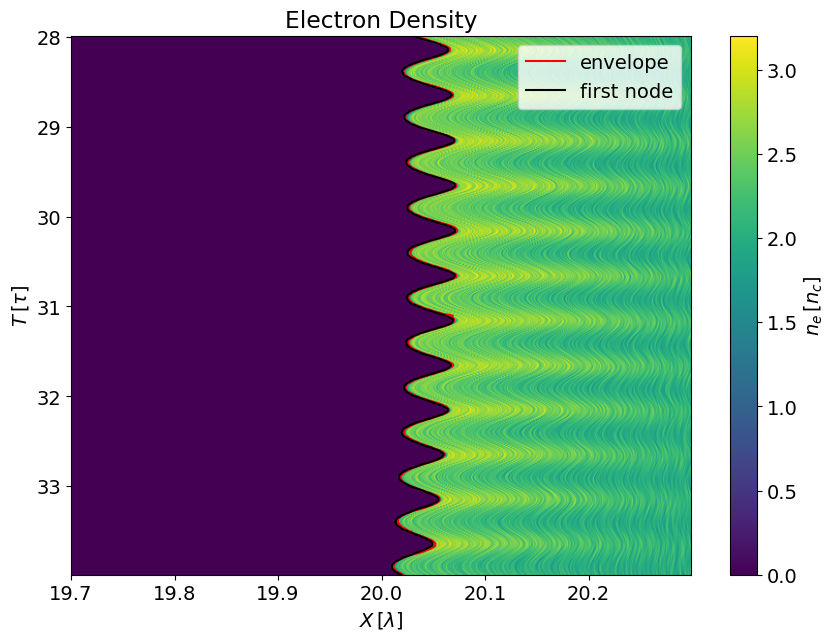

In [70]:
ax.lines.clear()
ax.plot(Xs[envelop], Ts, color="red", linewidth=1.5, label="envelope")
ax.plot(Xs[first], Ts, color="black", linewidth=1.5, label="first node")
ax.legend()
fig

In [71]:
ax.set_xlim(19.8, 20.2)
ax.set_ylim(30, 33)

(30.0, 33.0)

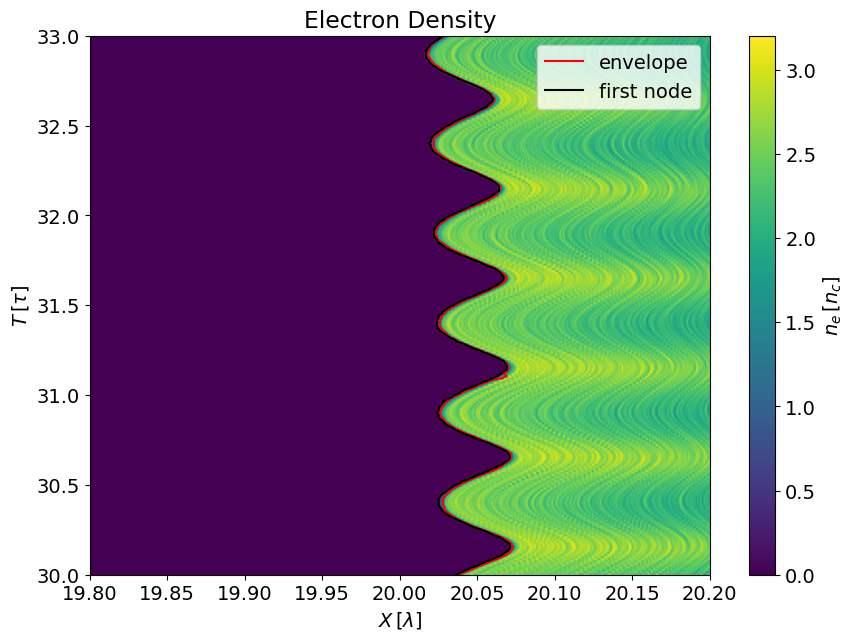

In [72]:
fig